# Unsupervised Learning

* In **supervised learning**, we know the right answer beforehand when we train our model
* In **reinforcement learning**, we define a measure of reward for particular actions by the agent. 
* In **unsupervised learning**, however, we are dealing with unlabeled data or data of unknown structure. 
* Using unsupervised learning techniques, we are able to explore the structure of our data to extract meaningful information **without the guidance of a known outcome variable or reward function**.

## Introduction to scikit-learn

Scikit-learn Cheat sheet at https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf

In [1]:
# Load datasets
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
print(iris.data)
print(iris.target)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

* The data is always a 2D array, shape (n_samples, n_features)
* Pandas.io provides tools to read data from common formats including CSV, Excel, JSON and SQL. DataFrames may also be constructed from lists of tuples or dicts. Pandas handles heterogeneous data smoothly and provides tools for manipulation and conversion into a numeric array suitable for scikit-learn. 
* Numpy/routines.io for standard loading of columnar data into numpy arrays

In [2]:
from sklearn import decomposition
dir(decomposition)

['DictionaryLearning',
 'FactorAnalysis',
 'FastICA',
 'IncrementalPCA',
 'KernelPCA',
 'LatentDirichletAllocation',
 'MiniBatchDictionaryLearning',
 'MiniBatchSparsePCA',
 'NMF',
 'PCA',
 'RandomizedPCA',
 'SparseCoder',
 'SparsePCA',
 'TruncatedSVD',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_online_lda',
 'base',
 'cdnmf_fast',
 'dict_learning',
 'dict_learning_online',
 'factor_analysis',
 'fastica',
 'fastica_',
 'incremental_pca',
 'kernel_pca',
 'nmf',
 'non_negative_factorization',
 'online_lda',
 'pca',
 'randomized_svd',
 'sparse_encode',
 'sparse_pca',
 'truncated_svd']

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_absolute_error, mean_squared_error

X, y = iris.data[:, :2], iris.target
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
# Use the standard and normalizer options to scale the data
scaler = preprocessing.StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
scaler = preprocessing.Normalizer().fit(X_train)
normalized_X = scaler.transform(X_train)
# Deal with missing data, axis 0 is columns
imp = Imputer(missing_values=0, strategy='mean', axis=0) 
imp.fit_transform(X_train)
# Error using MSE and MAE
y_true = [3, -0.6, 2]
y_pred = [3, -0.5, 2]
print(mean_absolute_error(y_true, y_pred))
print(mean_squared_error(y_true, y_pred))
# Accuracy score
y_true = [3, 4, 2]
y_pred = [3, 5, 2]
accuracy_score(y_true, y_pred)

0.0333333333333
0.00333333333333


0.66666666666666663

## Dimensionality Reduction with scikit-learn

* Often we are working with data of high dimensionality—each observation comes with a high number of measurements, that can present a challenge for limited storage space and the computational performance of machine learning algorithms. 
* Unsupervised dimensionality reduction is a commonly used approach in feature preprocessing to remove noise from data, which can also degrade the predictive performance of certain algorithms, and compress the data onto a smaller dimensional subspace while retaining most of the relevant information. 
* Sometimes, dimensionality reduction can also be useful for visualizing data—for example, a high-dimensional feature set can be projected onto one, two,or three-dimensional feature spaces in order to visualize it via 3D or 2D scatterplots or histograms. 

* There are two main categories of dimensionality reduction techniques: **feature selection** and **feature extraction**. Using feature selection, we select a subset of the original features. In feature extraction, we derive information from the feature set to construct a new feature subspace.




* Transformers are classes that implement both fit() and transform()
* Estimators are classes that implement both fit() and predict()

explained variance ratio (first two components): [ 0.92461621  0.05301557]


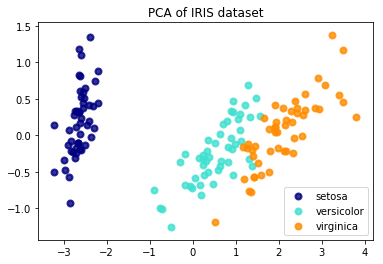

In [4]:
# Let us do the same above in 2D
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Apply PCA
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

# Percentage of variance explained for each components - How do you select the appropriate number of components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# Plot the figure in 2D
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

## Introduction to TensorFlow

### API guide is at https://www.tensorflow.org/api_guides/

In [5]:
import tensorflow as tf
sess = tf.InteractiveSession()

# Some tensor we want to print the value of
a = tf.constant([1.0, 3.0],name = "A")
b = a*3
hello = tf.constant('Hello, TensorFlow!')

print(a)
print(b)
#Explicitly call the shape function
print(a.get_shape())

#Execute the statements above
print(sess.run(a+a))
print(sess.run(a*2))
print(sess.run(a**2))
print(sess.run(b**2))
print(sess.run(hello))
# ANother way to do the same above
print((a*2).eval())

sess.close() # Because it is an interactive session we have to close it

Tensor("A:0", shape=(2,), dtype=float32)
Tensor("mul:0", shape=(2,), dtype=float32)
(2,)
[ 2.  6.]
[ 2.  6.]
[ 1.  9.]
[  9.  81.]
b'Hello, TensorFlow!'
[ 2.  6.]


## PCA example

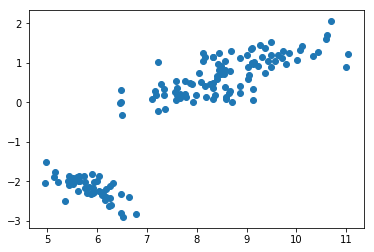

In [6]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Reset the graph, used mostly when working in Jupyter notebook environments
tf.reset_default_graph()

X_input = tf.placeholder(shape=[None,None], dtype=tf.float64)

# Call the SVD tensorflow function
s,u,v = tf.svd(X_input)
# Compute the 2-D projection
X_proj = tf.matmul(X,v[:,0:2])

init_vars = tf.global_variables_initializer()

with tf.Session() as sess:
    init_vars.run()
    # the returned variables are numpy arrays
    s_c, u_c, v_c, x_proj_c = sess.run([s,u,v,X_proj], feed_dict={X_input : X })
    
    #print(u_c,s_c,v_c)
    #print(x_proj_c)
    plt.figure()
    plt.scatter(x_proj_c[:,0],x_proj_c[:,1])
    plt.show()
    

## Autoencoder for Dimensionality Reduction

Reconstruction loss at  0  is  25.2114
Reconstruction loss at  50  is  1.3328
Reconstruction loss at  100  is  0.0345587
Reconstruction loss at  150  is  0.0288743
Reconstruction loss at  200  is  0.0268748
Reconstruction loss at  250  is  0.0254899
Reconstruction loss at  300  is  0.0245015
Reconstruction loss at  350  is  0.0237531
Reconstruction loss at  400  is  0.0231364
Reconstruction loss at  450  is  0.0225895
Reconstruction loss at  500  is  0.0220826
Reconstruction loss at  550  is  0.0216034
Reconstruction loss at  600  is  0.021148
Reconstruction loss at  650  is  0.0207156
Reconstruction loss at  700  is  0.0203063
Reconstruction loss at  750  is  0.01992
Reconstruction loss at  800  is  0.0195565
Reconstruction loss at  850  is  0.0192151
Reconstruction loss at  900  is  0.0188947
Reconstruction loss at  950  is  0.0185943
Reconstruction loss at  1000  is  0.0183125
Reconstruction loss at  1050  is  0.018048
Reconstruction loss at  1100  is  0.0177992
Reconstruction loss 

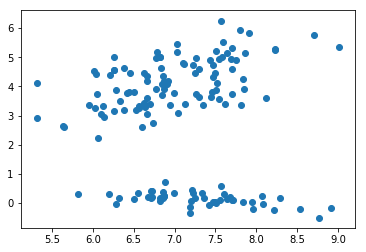

In [7]:
import tensorflow as tf 

# Load data
iris = datasets.load_iris()
X_data_train = iris.data[0:50]
X_data_test = iris.data[50:]
X_data_total = iris.data
Y_data_train = iris.target[0:50]
Y_data_test = iris.target[50:]
target_names = iris.target_names

n_inputs = 4 # 3D inputs 
n_hidden = 2 # 2D codings 
n_outputs = n_inputs 
learning_rate = 0.01

X = tf.placeholder( tf.float32, shape =[ None, n_inputs]) 
hidden = tf.layers.dense( X, n_hidden) 
outputs = tf.layers.dense( hidden, n_outputs) 
reconstruction_loss = tf.reduce_mean( tf.square( outputs - X)) # MSE

optimizer = tf.train.AdamOptimizer( learning_rate) 
training_op = optimizer.minimize( reconstruction_loss) 

init = tf.global_variables_initializer()


X_train, X_test = X_data_train, X_data_test # load the dataset 
n_iterations = 4000 
codings = hidden # the output of the hidden layer provides the codings 
with tf.Session() as sess:
    init.run() 
    for iteration in range( n_iterations): 
        #training_op.run( feed_dict ={ X: X_train}) # no labels (unsupervised) 
        t, rc = sess.run([training_op,reconstruction_loss], feed_dict = {X : X_train})
        
        if((iteration%50) == 0):
            print("Reconstruction loss at ",iteration," is ",rc)
        
    codings_val = codings.eval( feed_dict ={ X: X_data_total})

print(codings_val)
plt.figure()
plt.scatter(codings_val[:,0],codings_val[:,1])
plt.show()



## K-Means TensorFlow example

* Clustering is an exploratory data analysis technique that allows us to organize a pile of information into meaningful subgroups (clusters) without having any prior knowledge of their group memberships. 
* Each cluster that may arise during the analysis defines a group of objects that share a certain degree of similarity but are more dissimilar to objects in other clusters, which is why clustering is also sometimes called "unsupervised classification." 
* Clustering is a great technique for structuring information and deriving meaningful relationships among data
* For example, it allows marketers to discover customer groups based on their interests in order to develop distinct marketing programs.



## First example

* Height and Weight data of size 25000
* Data from http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html
* Goal is to find discrete T shirt sizes from this distribution, since there are no visible clusters
* Cluster each height, weight combination into one of four classes corresponding to sizes S,M,L,XL

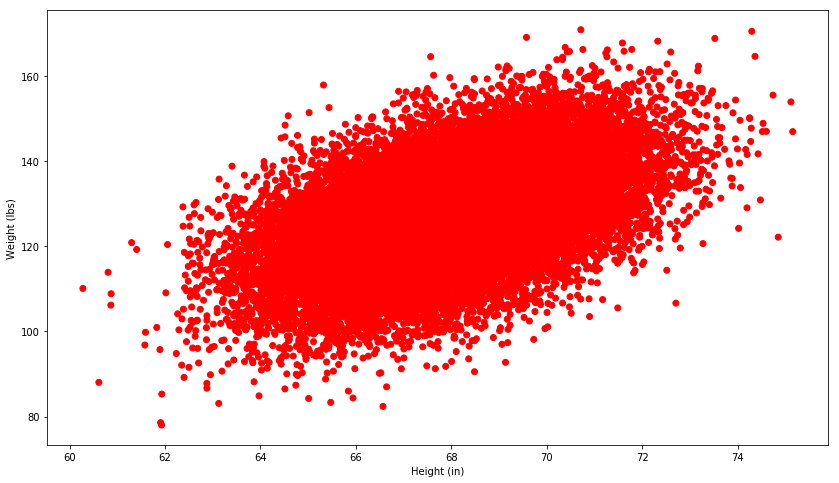

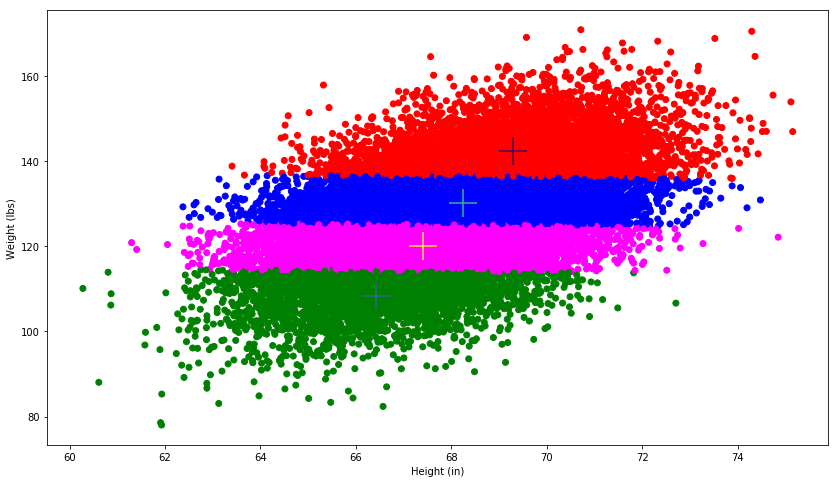

In [8]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import time

# Based on work from https://github.com/sentimos/kmeans/blob/master/KMeans.ipynb

def ScatterPlot(X, Y, assignments=None, centers=None):
  if assignments is None:
    assignments = [0] * len(X)
  fig = plt.figure(figsize=(14,8))
  cmap = ListedColormap(['red', 'green', 'blue', 'magenta']) # Colors are assigned based on the position of the 
   # cluster in the list 'clusters'
  plt.scatter(X, Y, c=assignments, cmap=cmap)
  if centers is not None:
    plt.scatter(centers[:, 0], centers[:, 1], c=range(len(centers)), 
                marker='+', s=800)  
  plt.xlabel('Height (in)')
  plt.ylabel('Weight (lbs)')
  plt.show()


def input_fn():
  return tf.constant(data.as_matrix(),
                     tf.float32, data.shape), None

# Data from http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html
data = pd.read_csv('untitled.txt',header=None,sep='\t',index_col=0)
data.columns = ['Height','Weight']

ScatterPlot(data.Height, data.Weight)

tf.logging.set_verbosity(tf.logging.ERROR)
kmeans = tf.contrib.learn.KMeansClustering(
    num_clusters=4, relative_tolerance=0.0001)

kmeans.fit(input_fn=input_fn)

clusters = kmeans.clusters() # Returns cluster centers as 2D coordinates
assignments = list(kmeans.predict_cluster_idx(input_fn=input_fn))

ScatterPlot(data.Height, data.Weight, assignments, clusters)
